In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Dense, Dropout,Flatten,BatchNormalization,Activation,Conv2D,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


In [ ]:
mnist = tf.keras.datasets.cifar100

(x_train,y_train),(x_validation,y_validation) = mnist.load_data()

x_train = x_train.reshape(50000,32,32,3)
x_validation = x_validation.reshape(10000,32,32,3)
x_train = x_train.astype("float32")
x_validation = x_validation.astype("float32")

In [ ]:
x_train /= 255
x_validation /= 255

y_train = to_categorical(y_train, num_classes=100, dtype='int64')
y_validation = to_categorical(y_validation, num_classes=100, dtype='int64')

In [ ]:
print("train samples", x_train.shape)
print("test samples",x_validation.shape)

train samples (50000, 32, 32, 3)
test samples (10000, 32, 32, 3)


In [ ]:
print("train label samples", y_train.shape)
print("test label samples",y_validation.shape)

train label samples (50000, 100)
test label samples (10000, 100)


In [ ]:
kernel_size = (3,3)
kernel_size_2 = (5,5)
pool_size = (2,2)
kernel_size_3 = (7,7)

model = Sequential()

In [ ]:
model.add(Conv2D(64,kernel_size_3,activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))


model.add(Conv2D(128,kernel_size_2,activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Conv2D(256,kernel_size,activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(100,activation='softmax'))



In [ ]:
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="model.hdf5",monitor="val_loss",verbose=1,save_best_only = True)

history = model.fit(x_train,y_train,validation_data=(x_validation,y_validation),epochs = 20,callbacks=[checkpointer])

Epoch 1/20
1561/1563 [============================>.] - ETA: 0s - loss: 2.5154 - accuracy: 0.3497
Epoch 1: val_loss improved from inf to 2.34294, saving model to model.hdf5
1563/1563 [==============================] - 14s 9ms/step - loss: 2.5155 - accuracy: 0.3497 - val_loss: 2.3429 - val_accuracy: 0.3902
Epoch 2/20
1559/1563 [============================>.] - ETA: 0s - loss: 2.5043 - accuracy: 0.3524
Epoch 2: val_loss did not improve from 2.34294
1563/1563 [==============================] - 14s 9ms/step - loss: 2.5048 - accuracy: 0.3523 - val_loss: 2.4405 - val_accuracy: 0.3714
Epoch 3/20
1558/1563 [============================>.] - ETA: 0s - loss: 2.4954 - accuracy: 0.3521
Epoch 3: val_loss improved from 2.34294 to 2.31422, saving model to model.hdf5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.4954 - accuracy: 0.3522 - val_loss: 2.3142 - val_accuracy: 0.3974
Epoch 4/20
1556/1563 [============================>.] - ETA: 0s - loss: 2.4876 - accuracy: 0.3526
Epoch

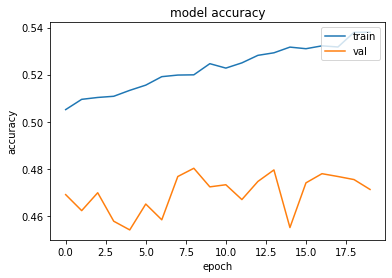

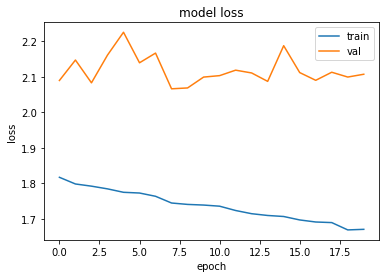

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        9472      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0